In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
df = pd.read_csv('hearts.csv')

In [3]:
df

,Id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,1022,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,1023,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,1024,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
df.dtypes

Id            int64
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
df['age'].unique()

array([52, 53, 70, 61, 62, 58, 55, 46, 54, 71, 43, 34, 51, 50, 60, 67, 45,
       63, 42, 44, 56, 57, 59, 64, 65, 41, 66, 38, 49, 48, 29, 37, 47, 68,
       76, 40, 39, 77, 69, 35, 74], dtype=int64)

0= Female
1= male

In [6]:
df['sex'].unique()

array([1, 0], dtype=int64)

0= Typical angina 1= Atypical angina 2= Non-anginal pain 3 =Asymptomatic

In [7]:
df['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [8]:
df['trestbps'].unique()

array([125, 140, 145, 148, 138, 100, 114, 160, 120, 122, 112, 132, 118,
       128, 124, 106, 104, 135, 130, 136, 180, 129, 150, 178, 146, 117,
       152, 154, 170, 134, 174, 144, 108, 123, 110, 142, 126, 192, 115,
        94, 200, 165, 102, 105, 155, 172, 164, 156, 101], dtype=int64)

In [9]:
df['chol'].unique()

array([212, 203, 174, 294, 248, 318, 289, 249, 286, 149, 341, 210, 298,
       204, 308, 266, 244, 211, 185, 223, 208, 252, 209, 307, 233, 319,
       256, 327, 169, 131, 269, 196, 231, 213, 271, 263, 229, 360, 258,
       330, 342, 226, 228, 278, 230, 283, 241, 175, 188, 217, 193, 245,
       232, 299, 288, 197, 315, 215, 164, 326, 207, 177, 257, 255, 187,
       201, 220, 268, 267, 236, 303, 282, 126, 309, 186, 275, 281, 206,
       335, 218, 254, 295, 417, 260, 240, 302, 192, 225, 325, 235, 274,
       234, 182, 167, 172, 321, 300, 199, 564, 157, 304, 222, 184, 354,
       160, 247, 239, 246, 409, 293, 180, 250, 221, 200, 227, 243, 311,
       261, 242, 205, 306, 219, 353, 198, 394, 183, 237, 224, 265, 313,
       340, 259, 270, 216, 264, 276, 322, 214, 273, 253, 176, 284, 305,
       168, 407, 290, 277, 262, 195, 166, 178, 141], dtype=int64)

0= false 1= true

In [10]:
df['fbs'].unique()

array([0, 1], dtype=int64)

0=Nothing to note    1=ST-T Wave abnormality     2= Possible or definite left ventricular hypertrophy

In [11]:
df['restecg'].unique()

array([1, 0, 2], dtype=int64)

In [12]:
df['thalach'].unique()

array([168, 155, 125, 161, 106, 122, 140, 145, 144, 116, 136, 192, 156,
       142, 109, 162, 165, 148, 172, 173, 146, 179, 152, 117, 115, 112,
       163, 147, 182, 105, 150, 151, 169, 166, 178, 132, 160, 123, 139,
       111, 180, 164, 202, 157, 159, 170, 138, 175, 158, 126, 143, 141,
       167,  95, 190, 118, 103, 181, 108, 177, 134, 120, 171, 149, 154,
       153,  88, 174, 114, 195, 133,  96, 124, 131, 185, 194, 128, 127,
       186, 184, 188, 130,  71, 137,  99, 121, 187,  97,  90, 129, 113],
      dtype=int64)

0= no  1= yes

In [13]:
df['exang'].unique()

array([0, 1], dtype=int64)

In [14]:
df['oldpeak'].unique()

array([1. , 3.1, 2.6, 0. , 1.9, 4.4, 0.8, 3.2, 1.6, 3. , 0.7, 4.2, 1.5,
       2.2, 1.1, 0.3, 0.4, 0.6, 3.4, 2.8, 1.2, 2.9, 3.6, 1.4, 0.2, 2. ,
       5.6, 0.9, 1.8, 6.2, 4. , 2.5, 0.5, 0.1, 2.1, 2.4, 3.8, 2.3, 1.3,
       3.5])

In [15]:
    0=Upsloping 1=Flatsloping 2= Downslopins

SyntaxError: cannot assign to literal (1051972653.py, line 1)

In [16]:
df['slope'].unique()

array([2, 0, 1], dtype=int64)

In [17]:
df.isnull().sum()

Id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1025 non-null   int64  
 1   age       1025 non-null   int64  
 2   sex       1025 non-null   int64  
 3   cp        1025 non-null   int64  
 4   trestbps  1025 non-null   int64  
 5   chol      1025 non-null   int64  
 6   fbs       1025 non-null   int64  
 7   restecg   1025 non-null   int64  
 8   thalach   1025 non-null   int64  
 9   exang     1025 non-null   int64  
 10  oldpeak   1025 non-null   float64
 11  slope     1025 non-null   int64  
 12  ca        1025 non-null   int64  
 13  thal      1025 non-null   int64  
 14  target    1025 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 120.2 KB


In [19]:
X = df.drop(['target','ca','thal','Id'], axis = 1)

y = df['target']

In [20]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,52,1,0,125,212,0,1,168,0,1.0,2
1,53,1,0,140,203,1,0,155,1,3.1,0
2,70,1,0,145,174,0,1,125,1,2.6,0
3,61,1,0,148,203,0,1,161,0,0.0,2
4,62,0,0,138,294,1,1,106,0,1.9,1
...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1
1022,47,1,0,110,275,0,0,118,1,1.0,1
1023,50,0,0,110,254,0,0,159,0,0.0,2


In [21]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [22]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)
print(X_train.shape)
print(X_test.shape)

(717, 11)
(308, 11)


In [24]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=0)

In [25]:
clf.score(X_train,y_train)

1.0

In [26]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test )
accuracy_score(y_pred,y_test) 

0.961038961038961

In [27]:
import sklearn.metrics

In [28]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       147
           1       0.96      0.96      0.96       161

    accuracy                           0.96       308
   macro avg       0.96      0.96      0.96       308
weighted avg       0.96      0.96      0.96       308



In [29]:
y_pred = clf.predict(X_test )
y_true=y_test


from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
cm

array([[141,   6],
       [  6, 155]], dtype=int64)

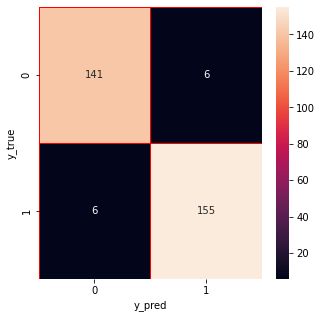

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [31]:
import pickle

pickle.dump(clf,open('heartd.pkl','wb'))
heart = pickle.load(open('heartd.pkl','rb'))